## Lab 2.1

#### Lab นี้ รอผลลัพธ์นานแล้วแต่เครื่อง

### LAB 2.1.1

In [6]:
import numpy as np
import cv2

# 1. อ่านภาพเข้ามาเป็น Image Array ที่มีสี
image = cv2.imread('./img/lab1-img1.jpg')
height, width, channels = image.shape

# 2. ปรับค่าพิกเซลของแต่ละช่องสี (R, G, B) โดยใช้สมการเส้นตรง g(x,y) = aƒ(x,y) + b
# และ 3. ปรับค่าพิกเซลที่เกินช่วงค่า bit_dept = 8
def adjust_pixel_value(image, a, b):
    new_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            for c in range(channels):
                value = a * image[i, j, c] + b
                if value > 255:
                    value = 255
                elif value < 0:
                    value = 0
                new_image[i, j, c] = value
    return new_image

# สร้างภาพทั้งหมด
images = []
for a in np.linspace(0.5, 1.5, 5):  # ปรับค่า a จาก 0.5 ถึง 1.5 ด้วยจำนวน 5 ค่า
    for b in np.linspace(-50, 50, 4):  # ปรับค่า b จาก -50 ถึง 50 ด้วยจำนวน 4 ค่า
        images.append(adjust_pixel_value(image, a, b))

# 4. บันทึกภาพทั้งหมดเป็นไฟล์วิดีโอ .mp4
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('./output/output_video.mp4', fourcc, 1, (width, height))

for img in images:
    out.write(img)

out.release()



### Lab 2.1.2

In [7]:
import cv2
import numpy as np

def adjust_gamma(image, gamma, a=1, b=0):
    # ปรับค่าพิกเซลของภาพโดยใช้สมการ Gamma
    image = image / 255.0
    image = cv2.pow(image, gamma)
    out = a * image + b
    out = np.clip(out, 0, 1)
    out = (out * 255).astype(np.uint8)
    return out

# โหลดภาพ
image_path = "./img/lab1-img1.jpg"
image = cv2.imread(image_path)

# กำหนดค่า gamma สำหรับการปรับค่าพิกเซล
gammas = np.concatenate((np.linspace(0.1, 1, 10), np.linspace(1.1, 2, 10)))

# สร้าง VideoWriter สำหรับเขียนวิดีโอ
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
height, width = image.shape[:2]
out = cv2.VideoWriter('./output/output.mp4', fourcc, 1.0, (width, height))

for gamma in gammas:
    adjusted = adjust_gamma(image, gamma)
    out.write(adjusted)

out.release()


# Lab 2.2

### Lab 2.2

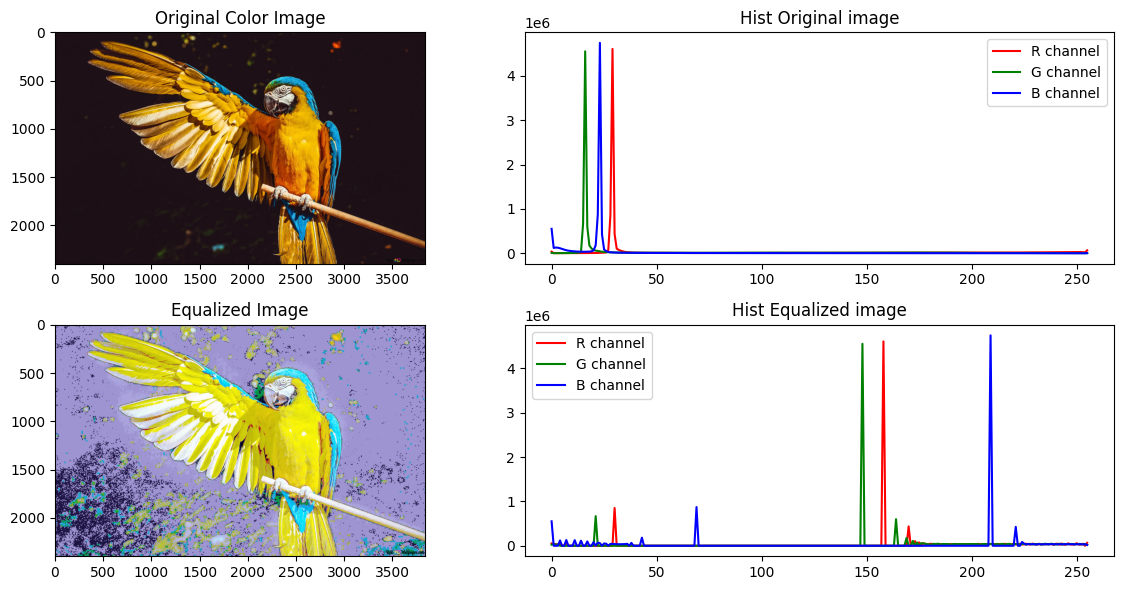

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# โหลดภาพ
image = cv2.imread('./img/lab1-img1.jpg')
# แปลงสีจาก BGR เป็น RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# แยกแต่ละช่องสี R, G, B
r, g, b = cv2.split(image)

# ทำ Histogram Equalization สำหรับแต่ละช่องสี
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# รวมช่องสี R, G, B กลับเป็นภาพสี
equalized_image = cv2.merge([r_eq, g_eq, b_eq])

# คำนวณ Histogram สำหรับภาพต้นฉบับและภาพหลังทำ Histogram Equalization
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

hist_r_eq = cv2.calcHist([r_eq], [0], None, [256], [0, 256])
hist_g_eq = cv2.calcHist([g_eq], [0], None, [256], [0, 256])
hist_b_eq = cv2.calcHist([b_eq], [0], None, [256], [0, 256])

# แสดงภาพและ Histogram
plt.figure(figsize=(12, 6))

# แถวแรก: ภาพต้นฉบับและ Histogram ของภาพต้นฉบับ
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Color Image')

plt.subplot(2, 2, 2)
plt.plot(hist_r, color='red', label='R channel')
plt.plot(hist_g, color='green', label='G channel')
plt.plot(hist_b, color='blue', label='B channel')
plt.title('Hist Original image')
plt.legend()

# แถวที่สอง: ภาพหลังทำ Histogram Equalization และ Histogram ของภาพหลังทำ
plt.subplot(2, 2, 3)
plt.imshow(equalized_image)
plt.title('Equalized Image')

plt.subplot(2, 2, 4)
plt.plot(hist_r_eq, color='red', label='R channel')
plt.plot(hist_g_eq, color='green', label='G channel')
plt.plot(hist_b_eq, color='blue', label='B channel')
plt.title('Hist Equalized image')
plt.legend()

plt.tight_layout()
plt.show()


# Lab 2.3

### Lab 2.3